In [4]:
%run -n main.py
%matplotlib inline

In [5]:
data = read_xls_data()

In [6]:
data.head()

,name,title,dosage,firm,amount,price,price2,id,code2,date,code1
0,None,Кагоцел,"таблетки 12 мг, 10 шт. - упаковки ячейковые ко...","ООО ""НИАРМЕДИК ПЛЮС"" - Россия",10,164.98,NaN,Р N002027/01,4.605340e+12,2015-10-07,1808-Пр/10
1,None,Пирфотех 99mТc,лиофилизат для приготовления раствора для внут...,"ООО ""Диамед"" - Россия",5,1435.32,NaN,Р N000494/01,4.606223e+12,2015-10-07,1620-Пр/10
2,None,Технефит 99mTc,лиофилизат для приготовления раствора для внут...,"ООО ""Диамед"" - Россия",5,1617.84,NaN,ЛС-002365,4.606223e+12,2015-10-07,1620-Пр/10
3,None,Технефор 99mTc,лиофилизат для приготовления раствора для внут...,"ООО ""Диамед"" - Россия",5,1662.12,NaN,ЛС-002366,4.606223e+12,2015-10-07,1620-Пр/10
4,Абакавир,Зиаген,"раствор для приема внутрь 20 мг/мл, 240 мл - ф...",ГлаксоСмитКляйн Инк - Канада,1,2440.97,NaN,П N011612/02,4.607008e+12,2015-10-07,5344-Пр/10


In [7]:
max_prices = get_max_prices(data)

In [8]:
serps = load_serps()

In [9]:
not_found, no_forms, join = join_forms(serps, max_prices)

Было скачано 3181 из 3156 (что-то со времен удаляется из таблички). ~200 не нашлось, ~800 не имеют дозы, предполагаем, что для них нет цен. ~2100 лекаств в суммы имеют ~4000 дозировок. Не для всех дозировок удалось найти максимальные цены. Примерно 25% не нашлось. Из 20 000 строчек из исходной таблицы в объединении участвуют ~8000, не знаю, плохо это или нет. Возможно в исходной таблицы много мелкого всего.

In [10]:
no_matches = join_stats(serps, max_prices, not_found, no_forms, join)

Total: 3181
Not found: 179
No forms: 822
In join: 2180

Forms: 3999
Matches: 2872
Data coverage: 8198


Посмотрим что из себя представляют эти 25%. Видно, что часть действительно не получится объединить. А часть нужно кропотливо отлаживать

In [324]:
# show_no_matches(no_matches)

Проверим вручную что попадает в объединение. Формально всё вроде бы норм. Действительно ли 100мг/20мл равно 5мг/мл? Внутри встречается сильный разброс в максимальных ценах. Нужно будет это отображать

In [131]:
# show_join(join)

In [11]:
prices = load_prices()

In [12]:
stats = join_prices(join, prices)

Всего ~4000 дозировки как и раньше. 75% имеют известные максимальные цены. Совсем для немногих не удалось найти цены совсем. Для примерно 15% объединилась только часть цен.

In [13]:
no_join, partial_join = stats_stats(stats)

Titles: 2180
Forms: 3999
Joined forms: 2872
Clean join: 2376
No join 42
Partial join 441


Среди совсем необъединившихся есть корректные. Правда иногда нет максимальной цены с данным amount. Иногда у максимальной цены amount none, тоже забиваем

In [13]:
# show_no_join(no_join)

Среди частично объединённых тоже есть корректные. Часто требует долгая крапотливая настройка.

In [14]:
# show_partial_join(partial_join)

Всё выглядит нормально. Похоже максимальные цены не максимальные. Нужно ещё добавить надбавки. Иногда бывается что у Спутника в одну дозировку попадают цены с другой.

In [15]:
# show_stats(stats)

In [370]:
popular = get_titles_popularity(stats, top=100)

In [145]:
# shows_stats(filter_stats(stats, popular))

In [371]:
dump_stats(filter_stats(stats, popular))

# Корректировка в пограничных зонах

45.45: 75.9924, 45.46: 71.50858
454.54: 714.99142, 454.55: 625.00625


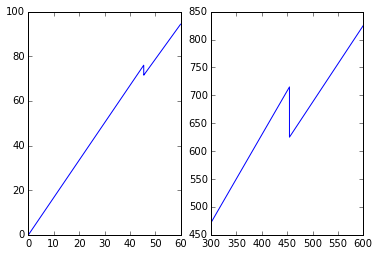

In [21]:
plot_steps()

454.54: 714.99142, 454.55: 714.99142


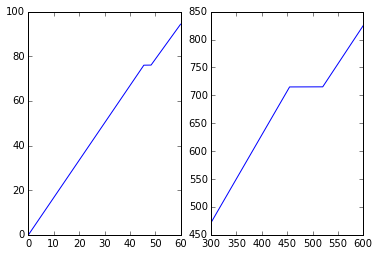

In [22]:
plot_steps(smooth=True)

In [365]:
%run -n main.py
dump_steps()

# Аптеки, которые превышают

In [25]:
%run -n main.py
%matplotlib inline

In [26]:
locations, coordinates = get_locations()

In [14]:
excesses = get_excesses(stats, locations)

In [15]:
excesses[(excesses.form == u'Фосфоглив®, капс.') & (excesses.price > excesses.limit)]

,form,amount,pharmacy,lat,lon,limit,price
103790,"Фосфоглив®, капс.",50,"ООО ""АС""Эвалар""",55.7282,37.6118,629.97077,903.4
103794,"Фосфоглив®, капс.",50,"ООО ""АС""Эвалар""",55.7282,37.6118,629.97077,888.4
103823,"Фосфоглив®, капс.",50,Формула Здоровья г.Москва Север,55.7846,37.6355,629.97077,841.0
103928,"Фосфоглив®, капс.",50,Формула Здоровья-2,55.8039,37.7154,629.97077,892.8
104183,"Фосфоглив®, капс.",50,"ООО ""ПРОГРЕСС-ФАРМА"" 7",55.7556,37.8583,629.97077,869.2
104184,"Фосфоглив®, капс.",50,Формула Здоровья-3,55.8225,37.8233,629.97077,889.0
104383,"Фосфоглив®, капс.",50,Формула здоровья,55.7981,37.9864,629.97077,887.5


In [44]:
excesses['group'] = excesses.pharmacy.map(get_pharmacy_group)
excesses['delta'] = excesses.price / excesses.limit - 1
excesses['difference'] = excesses.price - excesses.limit

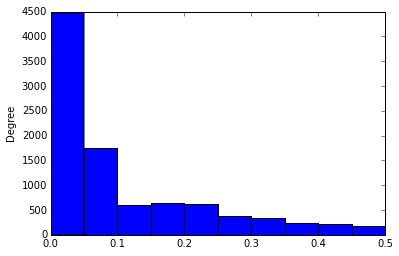

In [17]:
excesses.delta[(excesses.delta > 0) & (excesses.delta < 0.5)].plot(kind='hist')

Будем работать с превышениями до 30%, их ~9000 из ~12500. На больших превышениях алгоритм чаще ошибается.

In [18]:
print 'Total:', len(excesses[(excesses.delta > 0)])
print 'Not huge:', len(excesses[(excesses.delta > 0) & (excesses.delta < 0.3)])

Total: 12462
Not huge: 8455


Есть аптеки, в которых почти половина цен завишены.

In [454]:
table = pd.DataFrame()
table['excesses'] = excesses[(excesses.delta > 0) & (excesses.delta < 0.3)].groupby('group').size()
table['total'] = excesses.groupby('group').size()
table['share'] = table.excesses / table.total
table['error'] = np.sqrt(table.share * (1 - table.share) / table.total)
table['bound'] = table.share - table.error
table.sort('bound', inplace=False, ascending=False).head(30)

,excesses,total,share,error,bound
group,,,,,
"ООО ""Фармацевтика и Технологии""",81,190,0.426316,0.035878,0.390438
Pharmacorp Ltd,43,139,0.309353,0.039206,0.270147
Здравница Плюс,19,188,0.101064,0.021983,0.079081
"ООО ""Здоровый стиль""",31,383,0.080940,0.013937,0.067003
Фармакор,46,728,0.063187,0.009017,0.054170
ООО Жень-Шень,19,296,0.064189,0.014246,0.049944
"ООО ""Первый Мед"", г.Красногорск 2 (""Абсолют-Инвест"")",15,251,0.059761,0.014962,0.044799
Авиценна,125,2568,0.048676,0.004246,0.044430
"ОАО Гомеопатическая аптека ""Ганнеман""",5,69,0.072464,0.031211,0.041253


Попробуем учесть завышения. "Pharmacorp Ltd" и "Фармацевтика и Технологии" всё равно в топе. На них точно надо посмотреть внимательно. Дольше большая ступенька и порядок сильно отличается.

In [456]:
table = pd.DataFrame()
table['excesses'] = excesses[(excesses.delta > 0) & (excesses.delta < 0.3)].groupby('group').delta.sum()
table['total'] = excesses.groupby('group').size()
table['share'] = table.excesses / table.total
table['error'] = np.sqrt(table.share * (1 - table.share) / table.total)
table['bound'] = table.share - table.error
table.sort('bound', inplace=False, ascending=False).head(30)

,excesses,total,share,error,bound
group,,,,,
Pharmacorp Ltd,6.091023,139,0.043820,0.017362,0.026458
"ООО ""Фармацевтика и Технологии""",6.767279,190,0.035617,0.013446,0.022172
Вивафарм ООО,3.519033,628,0.005604,0.002979,0.002625
Сэсса Фарм,6.300102,1543,0.004083,0.001623,0.002460
Авиценна,9.238015,2568,0.003597,0.001181,0.002416
"ООО ""Здоровый стиль""",2.498280,383,0.006523,0.004113,0.002410
ООО Жень-Шень,1.943170,296,0.006565,0.004694,0.001871
ПРОГРЕСС-ФАРМА,6.951282,2590,0.002684,0.001017,0.001667
Самсон-Фарма,18.623090,8835,0.002108,0.000488,0.001620


Хотя бы одно превышение есть у многих аптек. Нужно взвешивать

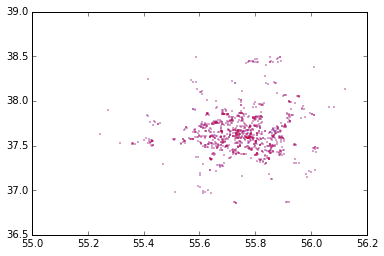

In [19]:
table = excesses[['pharmacy', 'lat', 'lon']].drop_duplicates()
plt.scatter(table.lat, table.lon, c='b', s=1, linewidth=0)
table = excesses[(excesses.delta > 0) & (excesses.delta < 0.3)][['pharmacy', 'lat', 'lon']].drop_duplicates()
plt.scatter(table.lat, table.lon, c='r', s=1, linewidth=0)

Нуу, может быть, в центре больше превышений. Но там аптек просто больше.

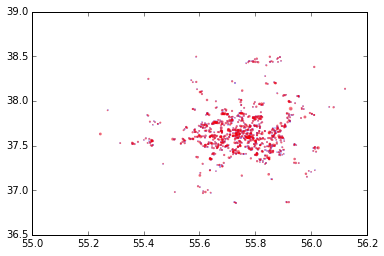

In [20]:
table = excesses[['pharmacy', 'lat', 'lon']].drop_duplicates()
plt.scatter(table.lat, table.lon, c='b', s=1, linewidth=0)
table = excesses[(excesses.delta > 0) & (excesses.delta < 0.3)]
table = table.groupby(['pharmacy', 'lat', 'lon']).delta.mean()
table = table.reset_index()
plt.scatter(table.lat, table.lon, c='r', alpha=0.5, s=table.delta * 50, linewidth=0)

In [45]:
%run -n main.py
table = excesses[(excesses.delta > 0) & (excesses.delta < 0.3)]
dump_excesses(table, locations, coordinates)